# Importing Modules

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.shape

(20800, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
X = data.drop('label',axis=1)

In [9]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
y = data.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
X.shape

(18285, 4)

In [25]:
X.index = [i for i in range(len(X))]
X.head(20)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [39]:
# Befire Stemming
print(len(X.text[0]))
print(X.text[0])

4930
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing em

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [41]:
ps = PorterStemmer()

corpus = []
for i in range(len(data)):
    text = re.sub(r'[^a-zA-Z]',' ', X.text[i])
    text = text.lower()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    corpus.append(' '.join(words))

In [40]:
# After Stemming
print(len(corpus[0]))
print(corpus[0])

2849
hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matte

In [109]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [110]:
X.shape

(18285, 5000)

In [111]:
tfidf.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [112]:
tfidf_df = pd.DataFrame(X,columns =tfidf.get_feature_names())

In [113]:
tfidf_df.head(10)

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020546,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.052766,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.038679,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.113822,0.13657,0.0,0.084201,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.054708,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.033583,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

In [97]:
def train(model,X,y):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
    
    # model fitting
    model[1].fit(X_train, y_train)
    
    print(model[0])
    print("Accuracy:", model[1].score(X_test,y_test))
    print()
    print('Confussion Matrix')
    
    plot_confusion_matrix(model[1],X_test,y_test,display_labels=["Real",'Fake'])
    plt.show()


LogisticRegression
Accuracy: 0.9506015311702516

Confussion Matrix


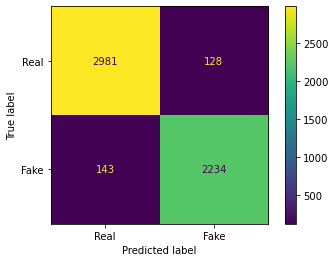


MultinomialNB
Accuracy: 0.9008384979948961

Confussion Matrix


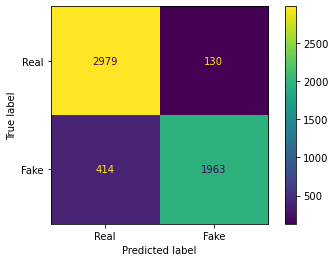

In [114]:
# TF-IDF 
models = [('LogisticRegression',LogisticRegression()),
         ('MultinomialNB',MultinomialNB())]

for model in models:
    train(model,X,y)
    print()

LogisticRegression
Accuracy: 0.9473204520597885

Confussion Matrix


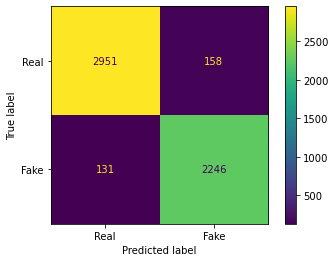


MultinomialNB
Accuracy: 0.9024790375501276

Confussion Matrix


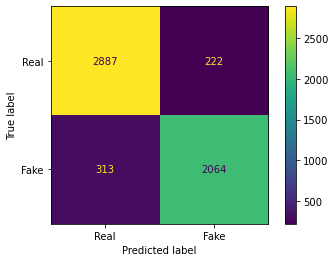

In [115]:
# Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = bow.fit_transform(corpus).toarray()

for model in models:
    train(model,X,y)
    print()